In [1]:
%matplotlib widget
import logging, os, traceback
from owslib.wmts import WebMapTileService
import cartopy.crs as ccrs
import os, conda, numbers, time, contextlib
from typing import List, Union, Tuple, Optional, Dict, Callable
import numpy as np
from spectraclass.data.spatial.tile.manager import TileManager, tm
from spectraclass.gui.spatial.image import TileServiceImage
from spectraclass.data.base import DataManager, dm
import xarray as xa
from matplotlib.image import AxesImage
from matplotlib.collections import QuadMesh
from matplotlib.figure import Figure
from cartopy.mpl.geoaxes import GeoAxes
from spectraclass.xext.xgeo import XGeo
from cartopy.io.ogc_clients import WMTSRasterSource
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import rioxarray as rio

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
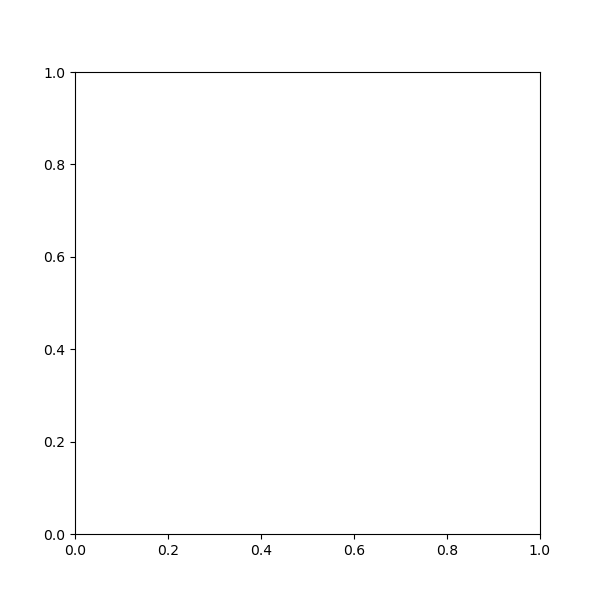

In [2]:
log_file = os.path.expanduser('~/.spectraclass/logging/geospatial.log')
file_handler = logging.FileHandler(filename=log_file, mode='w')
logger = logging.getLogger(__name__)
logger.addHandler(file_handler)
logger.setLevel(logging.DEBUG)

fig: plt.Figure = plt.figure( 0, figsize = (6, 6) )
ax: Axes = fig.add_subplot(111)

In [3]:
band_index = 100
dmi: DataManager = DataManager.initialize( "demo2",'desis' )
project_data: xa.Dataset = dmi.loadCurrentProject( "main" )
block = tm().getBlock()
plt: QuadMesh = block.data[band_index].plot(ax=ax)


Using config file: '/Users/tpmaxwel/.spectraclass/config/desis/demo2.py'
Opening log file:  '/Users/tpmaxwel/.spectraclass/logging/desis/demo2.log'
Loading metadata from file: /Users/tpmaxwel/Development/Data/DESIS/DESIS-HSI-L1C-DT0468853252_002-20200628T153803-V0210.mdata.txt


In [4]:
@contextlib.contextmanager
def hold_limits( gax ):
    data_lim = gax.dataLim.frozen().get_points()
    view_lim = gax.viewLim.frozen().get_points()
    other = (gax.ignore_existing_data_limits, gax._autoscaleXon, gax._autoscaleYon)
    try:
        yield
    finally:
        gax.dataLim.set_points(data_lim)
        gax.viewLim.set_points(view_lim)
        ( gax.ignore_existing_data_limits, gax._autoscaleXon, gax._autoscaleYon ) = other


In [5]:
tile_server_url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/WMTS'
crs = ccrs.epsg(3857)
tile_service = WebMapTileService( tile_server_url )
layer = list(tile_service.contents.keys())[0]
wmts = WMTSRasterSource( tile_service, layer )
img = TileServiceImage( ax, wmts)
with hold_limits(ax):
    ax.add_image(img)


